In [3]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import struct
from ctapipe.io.lsteventsource import LSTEventSource
from ctapipe.io import EventSeeker
from ctapipe.calib.camera import DRS4Pedestal, remove_pedestal_from_file

In [11]:
path_to_data = os.path.join("/home", "pawel1", "Pulpit", "Astrophysics", "CTA", "dragon",
                            "data", "dane_lst", "20180705", "Date20180705.0000.fits.fz")
reader = LSTEventSource(input_url=path_to_data)
seeker = EventSeeker(reader)
ev = seeker[0]
number_modules = ev.lst.tel[0].svc.num_modules

/home/pawel1/anaconda3/envs/cta-dev/lib/python3.6/site-packages/protozfits/__init__.py:56: UserWarning:         Multiple open zfits files at the same time are not supported.
        Reading from mutliple open tables at the same time will reset these
        tables continously and you will read always the same events.
        
  ''')


In [13]:
ev.r0.tel[0].waveform.shape

(2, 1834, 40)

In [5]:
Ped_drs4 = DRS4Pedestal("/home/pawel1/Pulpit/Astrophysics/CTA/ctapipe/examples/pedestal_value.dat", 262)
Ped_drs4.read_binary_file()
print("shape: ", Ped_drs4.pedestal_value.shape)

shape:  (262, 2, 7, 4096)


In [6]:
reader = LSTEventSource(input_url=path_to_data)
seeker = EventSeeker(reader)
ev = seeker[5500]

/home/pawel1/anaconda3/envs/cta-dev/lib/python3.6/site-packages/protozfits/__init__.py:56: UserWarning:         Multiple open zfits files at the same time are not supported.
        Reading from mutliple open tables at the same time will reset these
        tables continously and you will read always the same events.
        
  ''')


In [5]:
wav_after_remove_pedestal_module0 = remove_pedestal_from_file(ev, Ped_drs4) # remove pedestal for all modules 

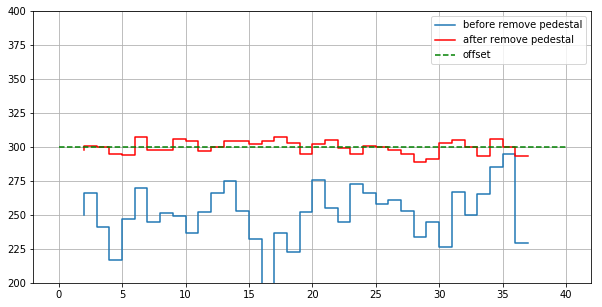

In [10]:
plt.rcParams['figure.figsize'] = 10, 5
nr = 50 #number of module 
pixel = 6
time = np.linspace(2, 37, 36)   
plt.step(time, ev.r0.tel[0].waveform[0, nr * 7:(nr + 1) * 7, 2:38][pixel], label="before remove pedestal")
plt.step(time, wav_after_remove_pedestal_module0[0, nr * 7:(nr + 1) * 7, 2:38][pixel], 'r-', label="after remove pedestal")
plt.plot([0, 40], [300, 300], 'g--', label="offset")
plt.ylim([200, 400])
plt.legend()
plt.grid(True)
plt.show()

In [7]:
print(ev)

{'count': 5500,
 'dl0': {'event_id': -1, 'obs_id': -1, 'tel': {}, 'tels_with_data': []},
 'dl1': {'tel': {}},
 'dl2': {'classification': {}, 'energy': {}, 'shower': {}},
 'inst': {'subarray': SubarrayDescription(name='MonteCarloArray', num_tels=0)},
 'lst': {'tel': {0: {'evt': {'cdts_data': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8),
                             'chips_flags': array([0, 0, 0, ..., 0, 0, 0], dtype=uint16),
                             'configuration_id': 1,
                             'counters': array([ 51,   0, 158, ...,   0,   0,   0], dtype=uint8),
                             'drs_tag': array([2188, 2195, 2179, ..., 1961, 1985, 1975], dtype=uint16),
                             'drs_tag_status': array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12

In [10]:
print(ev.r0.tel[0])

{'image': None,
 'num_samples': 40,
 'num_trig_pix': 0,
 'trig_pix_id': None,
 'trigger_time': 0,
 'trigger_type': 0,
 'waveform': array([[[313, 323, 287, ..., 324, 310, 260],
        [339, 343, 334, ..., 309, 333, 259],
        [275, 283, 289, ..., 280, 287, 272],
        ...,
        [257, 284, 287, ..., 258, 259, 232],
        [244, 261, 242, ..., 271, 267, 217],
        [312, 319, 323, ..., 300, 302, 269]],

       [[264, 270, 255, ..., 292, 326, 311],
        [273, 315, 274, ..., 275, 290, 245],
        [243, 226, 248, ..., 239, 271, 277],
        ...,
        [232, 186, 196, ..., 233, 233, 242],
        [216, 217, 217, ..., 173, 253, 281],
        [237, 209, 263, ..., 229, 249, 255]]], dtype=uint16)}


# Calib

In [11]:
import ctapipe
from ctapipe.utils.datasets import get_dataset_path
from ctapipe.io import event_source, EventSeeker
from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry
from matplotlib import pyplot as plt
from astropy import units as u
import numpy as np
%matplotlib inline
plt.style.use("ggplot")

In [12]:
filename = get_dataset_path("gamma_test.simtel.gz")
source = event_source(filename, max_events=2)

for event in source:
    print(event.r0.event_id)


408
409


In [16]:
print(event.dl1.tel)

defaultdict(<class 'ctapipe.io.containers.DL1CameraContainer'>, {})


In [24]:
from ctapipe.calib import CameraCalibrator

calib = CameraCalibrator(r1_product="HESSIOR1Calibrator")
calib.calibrate(event)

In [23]:
print(calib)

In [18]:
print(event.dl1.tel)


defaultdict(<class 'ctapipe.io.containers.DL1CameraContainer'>, {11: ctapipe.io.containers.DL1CameraContainer:
                         image: np array of camera image, after waveform
                                integration (N_pix)
                  gain_channel: boolean numpy array of which gain channel was
                                used for each pixel in the image
             extracted_samples: numpy array of bools indicating which samples
                                were included in the charge extraction as a
                                result of the charge extractor chosen.
                                Shape=(nchan, npix, nsamples).
                       peakpos: numpy array containing position of the peak as
                                determined by the peak-finding algorithm for
                                each pixel
                       cleaned: numpy array containing the waveform after
                                cleaning, 21: ctapipe.io.con

In [19]:
for tel_id in event.dl1.tel:
    print("TEL{:03}: {}".format(tel_id, event.inst.subarray.tel[tel_id]))
    print("  - r0  wave shape  : {}".format(event.r0.tel[tel_id].waveform.shape))
    print("  - r1  wave shape  : {}".format(event.r1.tel[tel_id].waveform.shape))
    print("  - dl1 image shape : {}".format(event.dl1.tel[tel_id].image.shape))

TEL011: MST:NectarCam
  - r0  wave shape  : (1, 1855, 30)
  - r1  wave shape  : (1, 1855, 30)
  - dl1 image shape : (1, 1855)
TEL021: MST:NectarCam
  - r0  wave shape  : (1, 1855, 30)
  - r1  wave shape  : (1, 1855, 30)
  - dl1 image shape : (1, 1855)
TEL118: MST-SCT:SCTCam
  - r0  wave shape  : (1, 11328, 32)
  - r1  wave shape  : (1, 11328, 32)
  - dl1 image shape : (1, 11328)
TEL119: MST-SCT:SCTCam
  - r0  wave shape  : (1, 11328, 32)
  - r1  wave shape  : (1, 11328, 32)
  - dl1 image shape : (1, 11328)
TEL024: MST:NectarCam
  - r0  wave shape  : (1, 1855, 30)
  - r1  wave shape  : (1, 1855, 30)
  - dl1 image shape : (1, 1855)
TEL026: MST:NectarCam
  - r0  wave shape  : (1, 1855, 30)
  - r1  wave shape  : (1, 1855, 30)
  - dl1 image shape : (1, 1855)
TEL061: SST-ASTRI:CHEC
  - r0  wave shape  : (1, 2048, 25)
  - r1  wave shape  : (1, 2048, 25)
  - dl1 image shape : (1, 2048)
TEL063: SST-ASTRI:CHEC
  - r0  wave shape  : (1, 2048, 25)
  - r1  wave shape  : (1, 2048, 25)
  - dl1 image 